# step 1

In [3]:
from pathlib import Path

p = Path("../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train_labels.txt")
f = open(p, "r")

# read filename - genre pairs

def extract_pair_from_str(input_line):
    filename, genre = input_line.split()
    filename = filename[:-3] # remove the .gz entension

    return (filename, genre)

pairs = f.readlines()[1:]
pairs = [extract_pair_from_str(x) for x in pairs]

#choose 2 FMA samples of different genre
selected_pairs = [pairs[0], pairs[160]]
print(selected_pairs)

[('1042.fused.full.npy', 'Blues'), ('115357.fused.full.npy', 'Chiptune')]


In [4]:
#import necessary libraries
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from help_code import *


# help-functions 
def read_mel_spectrogram(spectrogram_file):
    spectrogram_file = Path(spectrogram_file) # work in any OS
    spectrogram = np.load(spectrogram_file)[:128]
    return spectrogram

def read_chromagram(spectrogram_file):
    chromagram_file = Path(spectrogram_file) # work in any OS
    chromagram = np.load(spectrogram_file)[128:]
    return chromagram

def plot_spectrogram(mel, title):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mel, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title=title)
    fig.colorbar(img, ax=ax, format="%+2.f dB")

def plot_chroma(chroma, title):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    ax.set(title=title)
    fig.colorbar(img, ax=ax)
    



(128, 1293)
(128, 1293)


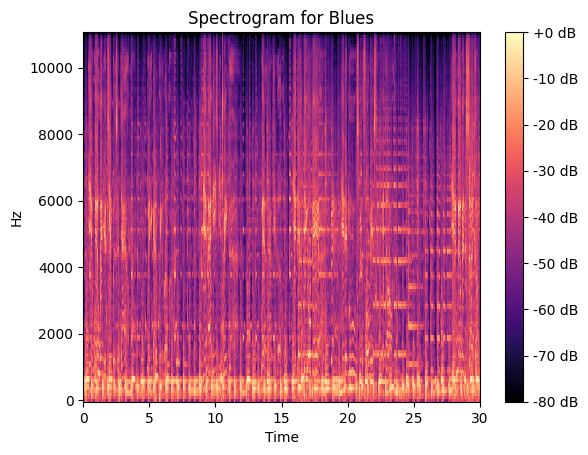

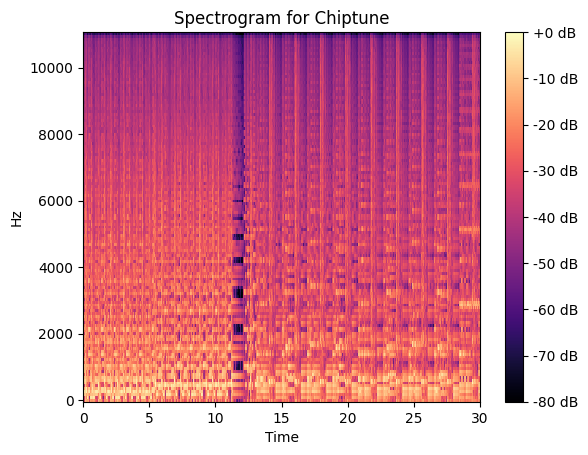

In [6]:
selected_mel = []

for filename, genre in selected_pairs:

    train_folder = '../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train'
    full_path = train_folder + "/" + filename
    mel = read_mel_spectrogram(full_path)
    selected_mel.append(mel)
    print(mel.shape)
    plot_spectrogram(mel, 'Spectrogram for ' + genre)


# Step 2

In [15]:
#dimensions
print("Spectrogram dimensions : ")
print(selected_mel[0].shape)
print(selected_mel[1].shape)
print()

Spectrogram dimensions : 
(128, 1293)
(128, 1293)



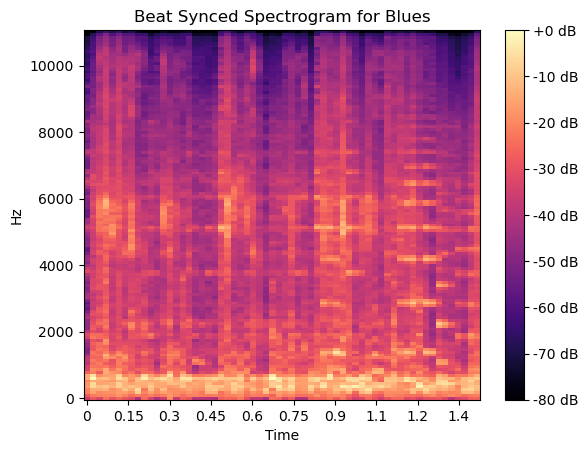

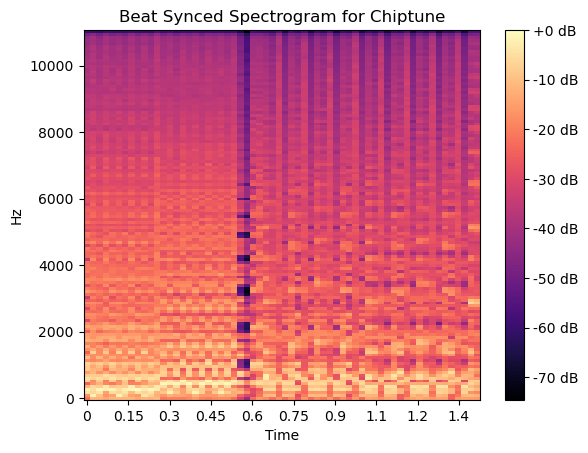

In [16]:
selected_mel_beat = []

for filename, genre in selected_pairs:

    train_folder = '../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train'
    full_path = train_folder + "/" + filename
    mel = read_mel_spectrogram(full_path)
    selected_mel_beat.append(mel)
    plot_spectrogram(mel, 'Beat Synced Spectrogram for ' + genre)

In [17]:
print("beat-synced Spectrogram dimensions ")
print(selected_mel_beat[0].shape)
print(selected_mel_beat[1].shape)
print()

beat-synced Spectrogram dimensions 
(128, 62)
(128, 62)



In [18]:
#dimensions
print("Spectrogram dimensions : ")
print(selected_mel[0].shape)
print(selected_mel[1].shape)
print()

Spectrogram dimensions : 
(128, 1293)
(128, 1293)



# Step 3

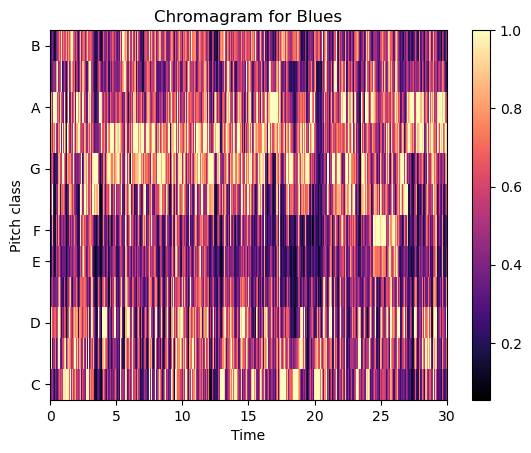

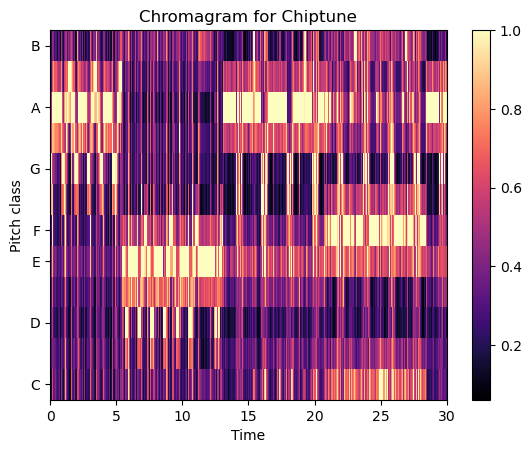

In [19]:
selected_chroma = []

for filename, genre in selected_pairs:

    train_folder = '../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms/train'
    full_path = train_folder + "/" + filename
    chroma = read_chromagram(full_path)
    selected_chroma.append(chroma)
    plot_chroma(chroma, 'Chromagram for ' + genre)

In [20]:
print("Chromagram dimensions ")
print(selected_chroma[0].shape)
print(selected_chroma[1].shape)
print()

Chromagram dimensions 
(12, 1293)
(12, 1293)



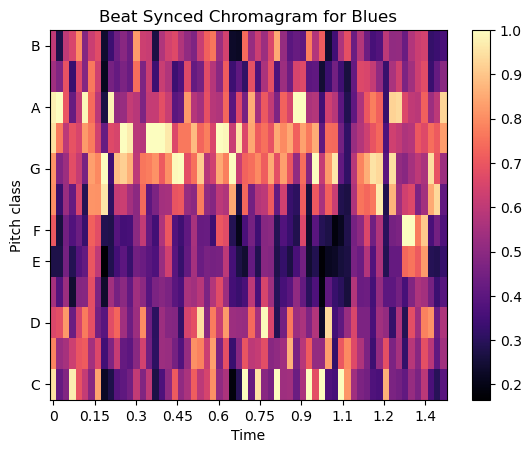

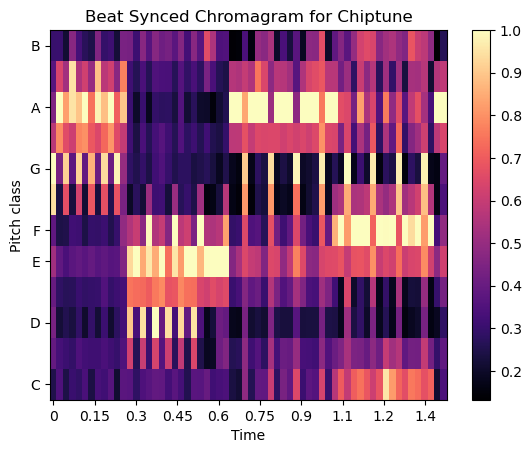

In [21]:
selected_chroma_beat = []

for filename, genre in selected_pairs:

    train_folder = '../input/patreco3-multitask-affective-music/data/fma_genre_spectrograms_beat/train'
    full_path = train_folder + "/" + filename
    chroma = read_chromagram(full_path)
    selected_chroma_beat.append(chroma)
    plot_chroma(chroma, 'Beat Synced Chromagram for ' + genre)

In [22]:
print("beat-synced Chromagram dimensions ")
print(selected_chroma_beat[0].shape)
print(selected_chroma_beat[1].shape)
print()

beat-synced Chromagram dimensions 
(12, 62)
(12, 62)

